<a href="https://colab.research.google.com/github/sahilutekar/sahil_utekar/blob/master/Tweeter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Importing the necsessary python libraries**


In [ ]:
# import packages
import re # For Regex 
import pandas as pd 
import numpy as np #for arrays
import matplotlib.pyplot as plt #for simple plotiing the results
import seaborn as sns
import string #For Punctuation
import nltk #For Natural Language Processing
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from collections import Counter #for wordlist

%matplotlib inline
pd.option_context('display.max_colwidth', 1000)

Importing the Dataset for our Project. The Dataset contains two files - one for the training purpose and other is the test data for the final result.

In [ ]:
train  = pd.read_csv('train.txt', sep=",")
test  = pd.read_csv('test_samples.txt', sep=",")

**Now we'll check that how many tweets are there for each kind of sentiments(Positive, Negative and Neutral)**

In [ ]:
sum(train["sentiment"] == "neutral") #To find nos of Neutral Tweets.

9014

In [ ]:
sum(train["sentiment"] == "positive") #To find nos of Neutral Tweets.

9064

In [ ]:
sum(train["sentiment"] == "negative") #To find nos of Neutral Tweets.

3387

**Performing some basic data exploration**




In [ ]:
#viewing top 5 rows
train.head(5)

,tweet_id,sentiment,tweet_text
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...


In [ ]:
#viewing top 5 rows
test.head(5)

,tweet_id,tweet_text
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor..."
1,218775148495515649,Musical awareness: Great Big Beautiful Tomorro...
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susa..."
4,171874368908050432,"Excuse the connectivity of this live stream, f..."


In [ ]:
#getting feature name and their types - to check for missing values
print("Feature names and their types : \n",train.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21465 entries, 0 to 21464
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    21465 non-null  int64 
 1   sentiment   21465 non-null  object
 2   tweet_text  21465 non-null  object
dtypes: int64(1), object(2)
memory usage: 503.2+ KB
Feature names and their types : 
 None 



In [ ]:
#getting feature name and their types - to check for missing values
print("Feature names and their types : \n",test.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5398 entries, 0 to 5397
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    5398 non-null   int64 
 1   tweet_text  5398 non-null   object
dtypes: int64(1), object(1)
memory usage: 84.5+ KB
Feature names and their types : 
 None 



In [ ]:
##shape of training data
print("Shape of Data : \n", train.shape, "\n")
print("No. of rows in the data = ", train.shape[0])
print("No. of columns in the data = ", train.shape[1])

Shape of Data : 
 (21465, 3) 

No. of rows in the data =  21465
No. of columns in the data =  3


In [ ]:
##shape of test data
print("Shape of Data : \n", test.shape, "\n")
print("No. of rows in the data = ", test.shape[0])
print("No. of columns in the data = ", test.shape[1])

Shape of Data : 
 (5398, 2) 

No. of rows in the data =  5398
No. of columns in the data =  2


In [ ]:
## Statistics for categorical features
print("See counts for sentiment columns : ")
train['sentiment'].value_counts()

See counts for sentiment columns : 


positive    9064
neutral     9014
negative    3387
Name: sentiment, dtype: int64

See percenatge for categorical columns : 
positive    42.226881
neutral     41.993944
negative    15.779175
Name: sentiment, dtype: float64


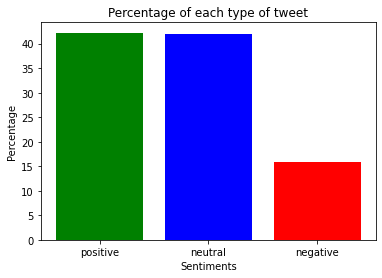

In [ ]:
print("See percenatge for categorical columns : ")
d = train['sentiment'].value_counts(normalize = True) * 100 # series
print(d)

## plot for analysis
plt.bar(x = d.index, height = d.values, label = d.index, color= ['green','blue','red'])
plt.xlabel("Sentiments")
plt.ylabel("Percentage")
plt.title("Percentage of each type of tweet")
plt.show()

So, The training data contains 42.2% positive tweets, 41.99% neutral tweets and rest 15.78% tweets are negative.

# Now the most important part i.e DATA CLEANING

1.Remove all kinds of emojis present in the text part.
2.Remove all kind urls(https:// or www...) from the text part.
3 Remove the punctuation marks from the text.

Note, that We're not writing a single function for all of these steps. Each step is done one by one for each training and test data.

In [ ]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

punctuation = '!"#$%&()*+-/:;<=>?@[\\]^_`{|}~'
P = set(punctuation)
P.add('•')
P.add('...')
P.add('....')
P.add(':')
P.add('Ä¶')
P.add('’')
P.add('♀')
P.add('ー')
P.add('``')

In [ ]:
train['tweet_text_clean'] = train['tweet_text'].apply(lambda x: deEmojify(x))
test['tweet_text_clean'] = test['tweet_text'].apply(lambda x: deEmojify(x))

train['tweet_text_clean'] = train['tweet_text'].apply(lambda x: re.sub(r'http\S+', '', x))
test['tweet_text_clean'] = test['tweet_text'].apply(lambda x: re.sub(r'http\S+', '', x))

train['tweet_text_clean'] = train['tweet_text'].apply(lambda x: ''.join(ch for ch in x if ch not in P))
test['tweet_text_clean'] = test['tweet_text'].apply(lambda x: ''.join(ch for ch in x if ch not in P))

Now, all the tweet texts of train and test data are cleaned



```
# This is formatted as code
```

# DATA PRE-PROCESSING

1.Tokenization For Tokenization, nltk('punkt') needs to be installed. It'll help to build the wordlist and the wordcloud.

2.Lemmatization Apart from the most commonly used lemmatizers, here we used spacy lemmatizer spaCy is a relatively new in the space and is billed as an industrial strength NLP engine. It comes with pre-built models that can parse text and compute various NLP related features through one single function call. Ofcourse, it provides the lemma of the word too. spaCy determines the part-of-speech tag by default and assigns the corresponding lemma. It comes with a bunch of prebuilt models where the ‘en’ we just downloaded above is one of the standard ones for english. It did all the lemmatizations the Wordnet Lemmatizer supplied with the correct POS tag did. Plus it also lemmatized ‘best’ to ‘good’. Nice! You’d see the -PRON- character coming up whenever spacy detects a pronoun.

3.Removing Stopwords Removing Stopwords is done at very last. The reason is after lemmatizing some unwanted characters come up in the text, so to remove those from the text, this is done at very last.

In [ ]:
import nltk
nltk.download('punkt')  
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.probability import FreqDist, ELEProbDist
from nltk.classify.util import apply_features,accuracy

In [ ]:
def tokenization(text):
    tokens = nltk.word_tokenize(text)
    return tokens

import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts):
    output = []
    for i in texts:
        s = [token.lemma_ for token in nlp(i)]
        output.append(' '.join(s))
    return output


stopword = nltk.corpus.stopwords.words('english')
stopword.append('amp')
stopword.append('-PRON-')
stopword.append('\r\n')
stopword.append('…')
stopword.append("'s")
stopword.append("'")
stopword.append('...')
stopword.append('v√°')
stopword.append('..')

def remove_sw(text):
  text_tokens = tokenization(text)
  tokens_without_sw= [word for word in text_tokens if not word in stopword]
  result = ' '.join(tokens_without_sw)
  return result 

In [ ]:
tokenized_tweet = train['tweet_text_clean'].apply(lambda x: tokenization(x)) #tokenizing
tokenized_tweet1 = test['tweet_text_clean'].apply(lambda x: tokenization(x)) #tokenizing

for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

train['tweet_text_clean'] = tokenized_tweet

for i in range(len(tokenized_tweet1)):
  tokenized_tweet1[i] = ' '.join(tokenized_tweet1[i])
test['tweet_text_clean'] = tokenized_tweet1


train['tweet_text_clean'] = lemmatization(train['tweet_text_clean'])
test['tweet_text_clean'] = lemmatization(test['tweet_text_clean'])

train['tweet_text_clean'] = train['tweet_text_clean'].apply(lambda x: remove_sw(x))
test['tweet_text_clean'] = test['tweet_text_clean'].apply(lambda x: remove_sw(x))

Now, all the cleaned tweet texts of train and test data are pre-processed.

Display of Word Distribution with respect to Wordlist

Display of Word Cloud

Display FREQUENCY DISTRIBUTION OF TOP 20 WORDS in the clean text of Training Data

In [ ]:
tokenized_tweet_r = train['tweet_text_clean'].apply(lambda x: tokenization(x)) #tokenizing
tokenized_tweet_t = test['tweet_text_clean'].apply(lambda x: tokenization(x)) #tokenizing
train['tokenized_text'] = tokenized_tweet_r
test['tokenized_text'] = tokenized_tweet_t
words = Counter()

for idx in train.index:
  words.update(train.loc[idx, 'tokenized_text'])

Q = ['.', ',']
for idx, stop_word in enumerate(Q):
    del words[stop_word]

words.most_common(5)

[('tomorrow', 3401), ('go', 2871), ('may', 2700), ('get', 1978), ('see', 1672)]

In [ ]:
min_occurrences=3
max_occurences=500
word_df = pd.DataFrame(data={"word": [k for k, v in words.most_common() if min_occurrences < v < max_occurences],
                                     "occurrences": [v for k, v in words.most_common() if min_occurrences < v < max_occurences]},
                               columns=["word", "occurrences"])

word_df.to_csv("wordlist.csv", index_label="idx")
import plotly
from plotly import graph_objs
words = pd.read_csv("wordlist.csv")
x_words = list(words.loc[0:10,"word"])
x_words.reverse()
y_occ = list(words.loc[0:10,"occurrences"])
y_occ.reverse()

dist = [
    graph_objs.Bar(
        x=y_occ,
        y=x_words,
        orientation="h"
)]
plotly.offline.iplot({"data":dist, "layout":graph_objs.Layout(title="Top words in built wordlist")})

In [ ]:
pp_list = []
temp = list(train['tweet_text_clean'])
for i in range(len(temp)):
  pp_list.append(temp[i])

In [ ]:
# for graphical display of preprocessed data
from nltk.tokenize import word_tokenize
tokens = []
for i in pp_list:
  tokens.extend(word_tokenize(i))


R = ['.', ',']
Token = []
for i in range(len(tokens)):
    if tokens[i] not in R:
        Token.append(tokens[i])
        
print("Top 20 words used in the tweets are : \n", Token[:20])

Top 20 words used in the tweets are : 
 ['gas', 'house', 'hit', '3.39', 'Iu2019', 'go', 'Chapel', 'Hill', 'Sat', 'Theo', 'Walcott', 'still', 'shitu002c', 'watch', 'Rafa', 'Johnny', 'deal', 'Saturday', 'Iu2019', 'GSP']



Word Cloud for the pre- processed data.


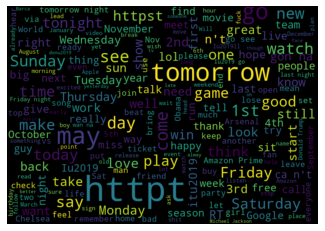

In [ ]:
def word_cloud(Token):
  '''A word cloud (also known as text clouds or tag clouds) is a visualization, 
  the more a specific word appears in the text, the bigger and bolder it appears in the word cloud.
  '''
  from wordcloud import WordCloud
  w = ' '.join([i for i in Token])
  wc = WordCloud(width = 1000, height = 700, random_state=21, max_font_size=110).generate(w)
  plt.imshow(wc, interpolation = "bilinear")
  plt.axis('off')
  plt.show()

print("\nWord Cloud for the pre- processed data.")

word_cloud(Token)

In [ ]:
def freq_words(Token):
  '''See frequency distribution of words'''
  from nltk.probability import FreqDist
  fdist = FreqDist(Token)
  
freq_words(Token)

Top 20 most common words in the data. 

      Tokens  Frequency
0   tomorrow       3401
1         go       2871
2        may       2700
3        get       1978
4        see       1672
5        day       1317
6      night       1286
7        1st       1232
8       like       1211
9        n't       1204
10      time       1197
11      good       1165
12      come       1145
13     watch       1106
14      game       1068
15      make       1064
16    Friday       1057
17    Sunday        971
18  Saturday        925
19       say        900


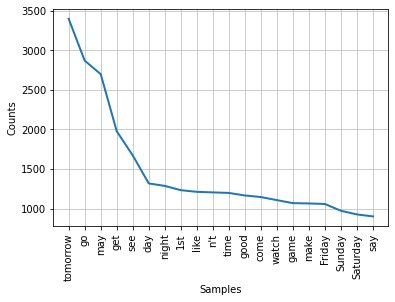

In [ ]:
# top 20 most common words
fdist = FreqDist(Token)
print("Top 20 most common words in the data. \n")
df = pd.DataFrame(fdist.most_common(20), columns=['Tokens', 'Frequency'])
print(df)

# plot of top 20 most common words
fdist.plot(20, cumulative = False)
plt.show()

First, all tweets from the training data are divided into three parts based on the sentiments, they are pos_tweets (contains all positive sentiment based clean tweet_text) , neu_tweets (contains all neutral sentiment based clean tweet_text), neg_tweets (contains all negative sentiment based clean tweet_text) with the format (clean tweet_text , sentiment)

In [ ]:
pos_tweets = []
neu_tweets = []
neg_tweets = []

Now We'll divide the training data into three parts based on the sentiment. Now We'll three separate dataframes Positive, Negative and Neutral.

In [ ]:
positive = train[train['sentiment'] == 'positive']
neutral = train[train['sentiment'] == 'neutral']
negative = train[train['sentiment'] == 'negative']

In [ ]:
a = list(positive['tweet_text_clean'])
b = list(positive['sentiment'])
c = len(a)
for i in range(c):
  temp = (a[i], b[i])
  pos_tweets.append(temp)

In [ ]:
d = list(neutral['tweet_text_clean'])
e = list(neutral['sentiment'])
f = len(d)
for i in range(f):
  temp = (d[i], e[i])
  neu_tweets.append(temp)

In [ ]:
g = list(negative['tweet_text_clean'])
h = list(negative['sentiment'])
j = len(g)
for i in range(j):
  temp = (g[i], h[i])
  neg_tweets.append(temp)

All three tweet lists pos_tweets , neu_tweets and neg_tweets are mergeed into a single list i.e tweets with the format (clean tweet_text , sentiment).

In [ ]:
tweets = []
for (words, sentiment) in pos_tweets+neu_tweets+neg_tweets:
  words_filtered=[e.lower() for e in words.split() if len(e)>=3]
  tweets.append((words_filtered,sentiment))

# This is the first approach using simple NLTK based Naive Bayes Classifer 

Using nltk.classify.naivebayes

For Naive Bayes classifer, It's important to extract features from tweets which will be useful for the classifications on the test data.

In [ ]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
      features['contains(%s)' % word] = (word in document_words)
    return features 

def get_words_in_tweets(tweets):
    all_words = []
    for (words, sentiment) in tweets:
      all_words.extend(words)
    return all_words

def get_word_features(wordlist):
    wordlist = FreqDist(wordlist)
    word_features = wordlist.keys()
    return word_features

All the features are stored in word_features

In [ ]:
word_features = get_word_features(get_words_in_tweets(tweets))

Now the training data is made ready.

In [ ]:
training_set = apply_features(extract_features, tweets)

**A classifier based on the Naive Bayes algorithm. In order to find the probability for a label, this algorithm first uses the Bayes rule to express P(label|features) in terms of P(label) and P(features|label):

| P(label) * P(features|label) | P(label|features) = ------------------------------ | P(features)

The algorithm then makes the 'naive' assumption that all features are independent, given the label:

| P(label) * P(f1|label) * ... * P(fn|label) | P(label|features) = -------------------------------------------- | P(features)

Rather than computing P(features) explicitly, the algorithm just calculates the numerator for each label, and normalizes them so they sum to one:

| P(label) * P(f1|label) * ... * P(fn|label) | P(label|features) = -------------------------------------------- | SUM[l]( P(l) * P(f1|l) * ... * P(fn|l) )**

A Naive Bayes classifier. Naive Bayes classifiers are paramaterized by two probability distributions:

  - P(label) gives the probability that an input will receive each
    label, given no information about the input's features.

  - P(fname=fval|label) gives the probability that a given feature
    (fname) will receive a given value (fval), given that the
    label (label).

If the classifier encounters an input with a feature that has
never been seen with any label, then rather than assigning a
probability of 0 to all labels, it will ignore that feature.

The feature value 'None' is reserved for unseen feature values;
you generally should not use 'None' as a feature value for one of
your own features.

In [ ]:
 classifier = nltk.classify.NaiveBayesClassifier.train(training_set)

Now the Naive Bayes Classifier will classify each of clean tweet text of test data and predict the sentiment of it and the results will be stored in Predictions list.

In [ ]:
test_tweets = list(test['tweet_text_clean'])
k = len(test_tweets)
predictions = []
for i in range(k):
  result = classifier.classify(extract_features(test_tweets[i].split()))
  predictions.append(result)


In [ ]:
len(predictions)

5398

Final_results will contain 5398 rows with each row have the tweet id and the associated prediction of the sentiment whether it's negative , neutral or positive.

In [ ]:
final_results = pd.DataFrame(columns = ['tweet_id', 'sentiment']) 
final_results['tweet_id'] = test['tweet_id']
final_results['sentiment'] = predictions

Check the count values for each of the predicted sentiments

In [ ]:
sum(final_results["sentiment"] == "neutral") #To find nos of Neutral Tweets.

2026

In [ ]:
sum(final_results["sentiment"] == "negative") #To find nos of Negative Tweets.

645

In [ ]:
sum(final_results["sentiment"] == "positive") #To find nos of Positive Tweets.

3044

In [ ]:
print("Analysis on the test dataset.. \n")
d = final_results['sentiment'].value_counts(normalize = True) * 100
if (d.index[np.argmax(d.values)] == 'positive'): 
  print("\nOverall Positive Sentiment.")
  print("Positive Sentiment Percentage = ", d.values[np.argmax(d.values)])
elif (d.index[np.argmax(d.values)] == 'negative'): 
  print("\nOverall Negative Sentiment.")
  print("Negative Sentiment Percentage = ", d.values[np.argmax(d.values)])
else:
  print("\nOverall Neutral Sentiment.")
  print("Neutral Sentiment Percentage = ", d.values[np.argmax(d.values)])  

Analysis on the test dataset.. 


Overall Positive Sentiment.
Positive Sentiment Percentage =  61.522786217117456


In [ ]:
#back to the .csv file
final_results.to_csv('final.csv', index=False)

# This is the second approach using SVM Model on TF-IDF Vectorizer

TF-IDF Features

This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account, not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

TF = (Number of times term t appears in a document)/(Number of terms in the document)
IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
TF-IDF = TF*IDF


In [ ]:
# Dividing Data to Training and Validation Sets
from sklearn.model_selection import train_test_split  
x = pp_list
y = train['sentiment'].values
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 1)
print("Number of data points in training data :\n")
print("X = ", len(x_train))
print("Y = ", len(y_train))

print("\nNumber of data points in validation data :\n")
print("X = ", len(x_val))
print("Y = ", len(y_val))

Number of data points in training data :

X =  17172
Y =  17172

Number of data points in validation data :

X =  4293
Y =  4293


In [ ]:
#Word Vectorization Using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(x_train)

val_vectors = vectorizer.transform(x_val)
print("Shape of training data : ",train_vectors.shape, "\nShape of validation data : ",val_vectors.shape)

Shape of training data :  (17172, 36577) 
Shape of validation data :  (4293, 36577)


In [ ]:
# building a SVM Model using tf- idf approach
from sklearn import svm
model_SVM = svm.SVC(kernel='linear')
model_SVM.fit(train_vectors, y_train)
print("Sentiment Analyzer from Support Vector Machine is ready and trained.")

Sentiment Analyzer from Support Vector Machine is ready and trained.


neutral     48.730491
positive    42.324715
negative     8.944794
Name: predicted, dtype: float64


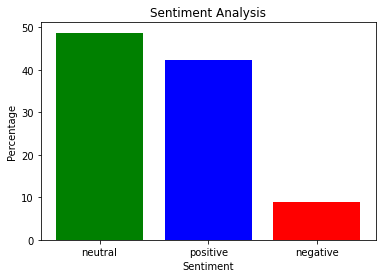

Confusion Matrix :
 [[ 222  312  127]
 [ 110 1278  442]
 [  52  502 1248]]
classification report: 
               precision    recall  f1-score   support

    negative       0.58      0.34      0.42       661
     neutral       0.61      0.70      0.65      1830
    positive       0.69      0.69      0.69      1802

    accuracy                           0.64      4293
   macro avg       0.63      0.58      0.59      4293
weighted avg       0.64      0.64      0.63      4293

Accuracy score  =  64.01118099231307


In [ ]:
def performance(model, y_true, vectors):
  from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  y_pred = model.predict(vectors)
  df = pd.DataFrame({'actual' : y_true, 'predicted' : y_pred})
  #Analysis after prediction
  d = df['predicted'].value_counts(normalize = True) * 100 # series
  print(d)
  ## plotting for the analysis
  plt.bar(x = d.index, height = d.values, label = d.index, color= ['green','blue','red'])
  plt.xlabel("Sentiment")
  plt.ylabel("Percentage")
  plt.title('Sentiment Analysis')
  plt.show()
  
  cm = confusion_matrix(y_true,y_pred)
  crp = classification_report(y_true,y_pred)
  acc = accuracy_score(y_true,y_pred)
  return (cm, crp, acc)

#Let us test the performance of our model on the validation set to predict the sentiment labels using the different ML models trained.
perform = performance(model_SVM, y_val, val_vectors)
print("Confusion Matrix :\n", perform[0])  
print("classification report: \n", perform[1])  
print("Accuracy score  = ", perform[2] *100)

In [ ]:
print("\nShape of test data = ", test.shape)
test_list = list(test['tweet_text_clean'])

#finding the vectors for the test data
test_vectors = vectorizer.transform(test_list)
print("Shape of testing features : ",test_vectors.shape)
print("-" * 50)

#Let us test the performance of our model on the testing set to predict the sentiment labels
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predicted = model_SVM.predict(test_vectors)

print("Final Results after applying SVM on TF-IDF Vectorizer: \n")
svm_results = pd.DataFrame({'tweet_id' : test['tweet_id'].astype(str), 'sentiment' : predicted}, 
                       columns = ['tweet_id', 'sentiment'])

svm_results.to_csv("finalv2.csv", sep= ",", index = False)
print("-" * 50)

print("Analysis on the test dataset.. \n")
d = svm_results['sentiment'].value_counts(normalize = True) * 100
if (d.index[np.argmax(d.values)] == 'positive'): 
  print("\nOverall Positive Sentiment.")
  print("Positive Sentiment Percentage = ", d.values[np.argmax(d.values)])
elif (d.index[np.argmax(d.values)] == 'negative'): 
  print("\nOverall Negative Sentiment.")
  print("Negative Sentiment Percentage = ", d.values[np.argmax(d.values)])
else:
  print("\nOverall Neutral Sentiment.")
  print("Neutral Sentiment Percentage = ", d.values[np.argmax(d.values)])  


Shape of test data =  (5398, 4)
Shape of testing features :  (5398, 36577)
--------------------------------------------------
Final Results after applying SVM on TF-IDF Vectorizer: 

--------------------------------------------------
Analysis on the test dataset.. 


Overall Neutral Sentiment.
Neutral Sentiment Percentage =  53.945905891070765


Extra features from TF-IDF helps us to find similarity between words, that means it can find similarity to the specific emotion-representing words. The first idea was to compute similarity of the whole tweet with words from labels: positive, negative, neutral. Since the purpose was to find the sentiment, it will be better to find similarity with more expressive words such as: good and bad. For the neutral sentiment, using word information, since most of the tweets with neutral sentiment were giving the information.
The features were builded by computing mean similarity of the whole tweet to the given word. Then, those mean values were normalized to between 0 and 1 in order to deal with different word count across tweets.